### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

sys.path.append("../")
import helper as hp

In [3]:
df = pd.read_excel("/Users/michaelmoret/Desktop/Externa/data/pulling/16-02-24/20240216_CLEANED.xlsx")
df.head(10)

,Test ID,Batch,Young's Modulus,Break force,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,MPa/%,g,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break force,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Start Batch 20240216_bleach_WAX4_,20240216_bleach_WAX4_,NaN,NaN,NaN,NaN,NaN
4,20240216_bleach_WAX4_51,20240216_bleach_WAX4_,41.522,86.53,48.0,49.0,ok
5,20240216_bleach_WAX4_52,20240216_bleach_WAX4_,53.47,96.708,46.0,47.0,breakend
6,20240216_bleach_WAX4_53,20240216_bleach_WAX4_,64.739,133.945,56.0,59.0,ok
7,20240216_bleach_WAX4_54,20240216_bleach_WAX4_,58.097,117.47,54.0,65.0,breakend
8,20240216_bleach_WAX4_55,20240216_bleach_WAX4_,41.574,86.226,54.0,54.0,breakend
9,20240216_bleach_WAX4_56,20240216_bleach_WAX4_,40.26,107.414,48.0,53.0,breakend


In [4]:
df = df.rename(columns={'Unnamed: 4': 'Diameter 1', 
                        'Unnamed: 5': 'Diameter 2',
                        'Unnamed: 6': 'Note'})
df.head(2)

,Test ID,Batch,Young's Modulus,Break force,Diameter 1,Diameter 2,Note
0,NaN,NaN,MPa/%,g,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break force,NaN,NaN,NaN


In [5]:
df = df.dropna()

In [6]:
df['Break force'] = df['Break force'].astype(float)
df['Young\'s Modulus'] = df['Young\'s Modulus'].astype(float)
df.head(2)

,Test ID,Batch,Young's Modulus,Break force,Diameter 1,Diameter 2,Note
4,20240216_bleach_WAX4_51,20240216_bleach_WAX4_,41.522,86.530,48.0,49.0,ok
5,20240216_bleach_WAX4_52,20240216_bleach_WAX4_,53.470,96.708,46.0,47.0,breakend


In [7]:
df = df[df['Test ID'] != 'Average:']
df = df[df['Test ID'] != 'S.D.']
df = df[df['Test ID'] != 'Coef. of Variation']

In [8]:
df['Average'] = ((df['Diameter 1'] + df['Diameter 2']) / 2 )/1000
df['Area'] = math.pi * (df['Average'] / 2)**2

In [9]:
df['Baseline area'] = math.pi * 0.035**2
df['Updated Young\'s Modulus'] = df['Young\'s Modulus'] * (df['Baseline area'] / df['Area'])

In [10]:
df['Break stress'] = df['Break force'] / df['Area'] / 1000

In [11]:
df.head(2)

,Test ID,Batch,Young's Modulus,Break force,Diameter 1,Diameter 2,Note,Average,Area,Baseline area,Updated Young's Modulus,Break stress
4,20240216_bleach_WAX4_51,20240216_bleach_WAX4_,41.522,86.530,48.0,49.0,ok,0.0485,0.001847,0.003848,86.494973,46.837461
5,20240216_bleach_WAX4_52,20240216_bleach_WAX4_,53.470,96.708,46.0,47.0,breakend,0.0465,0.001698,0.003848,121.171465,56.946445


<Figure size 1000x600 with 0 Axes>

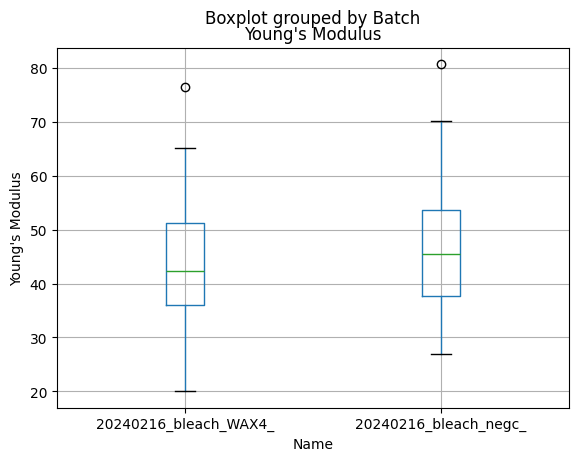

In [12]:
def do_plot(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column="Young's Modulus", by='Batch')
    plt.xlabel('Name')
    plt.ylabel("Young's Modulus")
    #plt.ylim(15, 90)
    plt.show()

do_plot(df)


In [13]:
count = len(df[df['Batch'].str.contains('WAX4')])
print(count)

98


In [14]:
count = len(df[df['Batch'].str.contains('negc')])
print(count)

89


In [15]:
hp.get_pvalue_and_sample_size(df, "Young's Modulus")

(                       20240216_bleach_WAX4_  20240216_bleach_negc_
 20240216_bleach_WAX4_                  1.000                  0.084
 20240216_bleach_negc_                  0.084                  1.000,
                        20240216_bleach_WAX4_  20240216_bleach_negc_
 20240216_bleach_WAX4_                  -1.00                 189.02
 20240216_bleach_negc_                 189.02                  -1.00)

In [16]:
unique_values = df['Note'].unique()
print(unique_values)

['ok' 'breakend' 'slip' 'early' 'breakend ' 'early ' 'endbreak'
 'slip and break' 'weakness']


let's remove the slip and early

In [17]:
len(df)

187

In [18]:
df = df[(df['Note'] != 'slip') & (df['Note'] != 'early') & (df['Note'] != 'slip and break') & (df['Note'] != 'weakness')]
len(df)

166

<Figure size 1000x600 with 0 Axes>

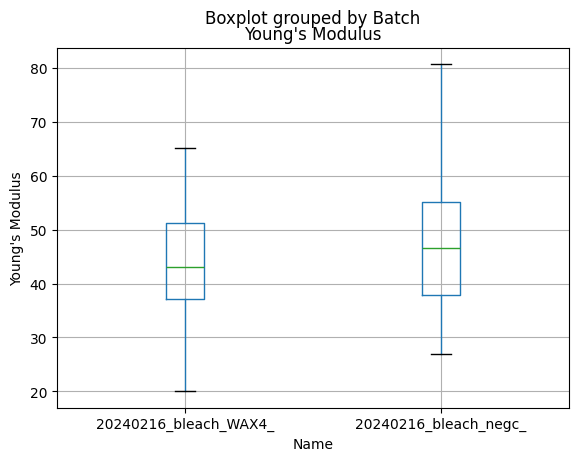

In [19]:
do_plot(df)

In [20]:
count = len(df[df['Batch'].str.contains('WAX4')])
print(count)

88


In [21]:
count = len(df[df['Batch'].str.contains('negc')])
print(count)

78


In [22]:
hp.get_pvalue_and_sample_size(df, 'Break stress')

(                       20240216_bleach_WAX4_  20240216_bleach_negc_
 20240216_bleach_WAX4_                  1.000                  0.061
 20240216_bleach_negc_                  0.061                  1.000,
                        20240216_bleach_WAX4_  20240216_bleach_negc_
 20240216_bleach_WAX4_                  -1.00                 168.18
 20240216_bleach_negc_                 168.18                  -1.00)

In [23]:
df = df[df['Note'] == 'ok']
len(df)

106

<Figure size 1000x600 with 0 Axes>

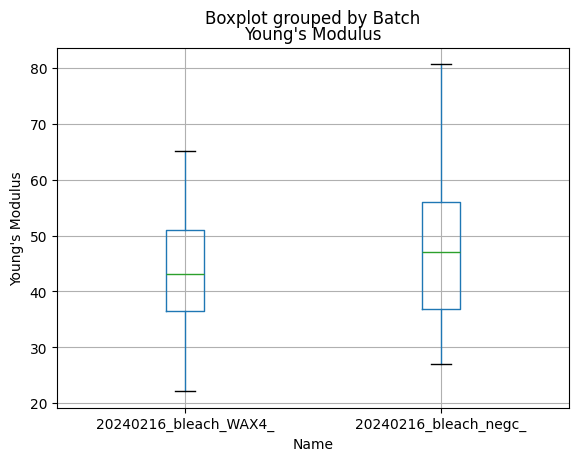

In [24]:
do_plot(df)

In [25]:
count = len(df[df['Batch'].str.contains('WAX4')])
print(count)


60


In [26]:
count = len(df[df['Batch'].str.contains('negc')])
print(count)

46


In [27]:
hp.get_pvalue_and_sample_size(df, 'Break stress')

(                       20240216_bleach_WAX4_  20240216_bleach_negc_
 20240216_bleach_WAX4_                  1.000                  0.034
 20240216_bleach_negc_                  0.034                  1.000,
                        20240216_bleach_WAX4_  20240216_bleach_negc_
 20240216_bleach_WAX4_                  -1.00                  80.34
 20240216_bleach_negc_                  80.34                  -1.00)

In [28]:
hp.get_sample_size_one_distri(df, 'Break stress')

,Batch,n (2.5% of mean),n (5.0% of mean),n (10.0% of mean),n (20.0% of mean)
0,20240216_bleach_WAX4_,205,52,13,4
1,20240216_bleach_negc_,190,48,12,3
